# Quick Review

- Let's step back after our first couple of sessions and try to simplify things.

In [47]:
# imports
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [48]:
#scikit version - we want 1.0+
import sklearn
sklearn.__version__

'1.0.1'

# Tokenization

In [49]:
# create a simple corpus
corpus = ["I can't love this game.", "I can't hate this game."]

In [50]:
# fit the tokenization model (CountVectorizer) to the corpus
# this learns our vocabulary for the corpus
# the vocab is our features, just like any other dataset!
cv = CountVectorizer()
cv.fit(corpus)

CountVectorizer()

In [51]:
# what is the length vocab
len(cv.vocabulary_)

5

In [52]:
# what is the vocab
# below is a dictionary of token -> id mappings
cv.vocabulary_

{'can': 0, 'game': 1, 'hate': 2, 'love': 3, 'this': 4}

In [53]:
# we can also get the features
cv.get_feature_names_out()

array(['can', 'game', 'hate', 'love', 'this'], dtype=object)

> Notice that single token words weren't extracted and the contraction wasn't handled properly

In [54]:
# we can change the token pattern to split on whitespace
cv = CountVectorizer(token_pattern="\S+", )
cv.fit(corpus)

CountVectorizer(token_pattern='\\S+')

In [55]:
# we might consider this a better representation
# and highlights that sometimes we may want to review the patterns per our task
# start small!  create a small corpus to review it like we are here!
cv.get_feature_names_out()

array(["can't", 'game.', 'hate', 'i', 'love', 'this'], dtype=object)

In [56]:
# lets get the dtm array
# we apply the bag of words model via transform
dtm = cv.transform(corpus)

In [57]:
# what do we have
type(dtm)

scipy.sparse.csr.csr_matrix

In [58]:
# we can get the dense representation of the matrix
# but worth noting, this is just like any other numeric-only dataset in pandas
dtm.toarray()

array([[1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 0, 1]])

In [59]:
# we can always put this into a dataframe
df = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())

df

,can't,game.,hate,i,love,this
0,1,1,0,1,1,1
1,1,1,1,1,0,1


> We have seen that we can use our own tokenizer, perhaps you want to remove the punctuation.  We will see how other tools like the amazing spacy handle this.

In [60]:
# lets say we have a new document to review
doc = "I LIKE PYTHON"

In [61]:
# lets tokenize this text based on our existing vocabulary
tokens = cv.transform([doc])

# note above I need to pass in a single piece of text as a list

In [62]:
# what do we have?
tokens.shape

(1, 6)

In [63]:
# lets review
docdf = pd.DataFrame(tokens.toarray(), columns=cv.get_feature_names_out())

docdf

,can't,game.,hate,i,love,this
0,0,0,0,1,0,0


> Notice that the terms `like` and `python` were not part of the original vocabulary.  This highlights that Out of Vocabulary words are ignored when fitting to new text/datasets.  This is one of the challenges of NLP, and also highlights that NLP tasks usually require a large, and representative, __training__ corpus.

# Weighting

In [64]:
# lets use the same original, training corpus
tv = TfidfVectorizer(token_pattern="\S+")

# fit to the training corpus
tv.fit(corpus)

TfidfVectorizer(token_pattern='\\S+')

In [65]:
# the output is the same, its just a weighting scheme
tfidf = tv.transform(corpus)

tfidf.shape

(2, 6)

In [66]:
# put this into a dataframe
df = pd.DataFrame(tfidf.toarray(), columns=tv.get_feature_names_out())

df

,can't,game.,hate,i,love,this
0,0.40909,0.40909,0.000000,0.40909,0.574962,0.40909
1,0.40909,0.40909,0.574962,0.40909,0.000000,0.40909


> Note that we are just reweighting the data.  Let's plot this for intuition.

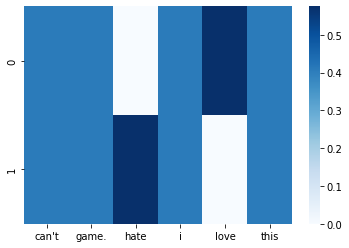

In [67]:
sns.heatmap(df, cmap="Blues")

In [68]:
# lets review the corpus again
corpus

["I can't love this game.", "I can't hate this game."]

### Discussion

- Both documents in the corpus are the exact same length
- Only one 1 word is different
- The weights are the exact same for the overlapping tokens
- The tokens get a score of 0 if they don't exist, just like in a basic count
- The token that is  unique to each of the documents gets a higher weight, with the intuition that it carries more meaning.